# ML: Homework 2 - Question 4 through 6
## Arash Latifi - 810197576
### Srping 2022

---
# Q4) Overfitting and Underfitting

First, we create raw data using python numpy list.

In [187]:
import matplotlib.pyplot as plt
import numpy as np

In [188]:
x = np.arange(-10 , 10 , 0.2)
y = 2 * np.cos(x)/(-np.pi) + 2 * np.sin(2*x)/(2*np.pi) + 2 * np.cos (3*x)/(-3*np.pi)

P1) Adding the white gaussian noise to the data.

In [189]:
y1 = y + 0.12 * np.random.standard_normal(size = len(y))
y2 = y + 0.12 * np.random.poisson(lam = 2, size = len(y))

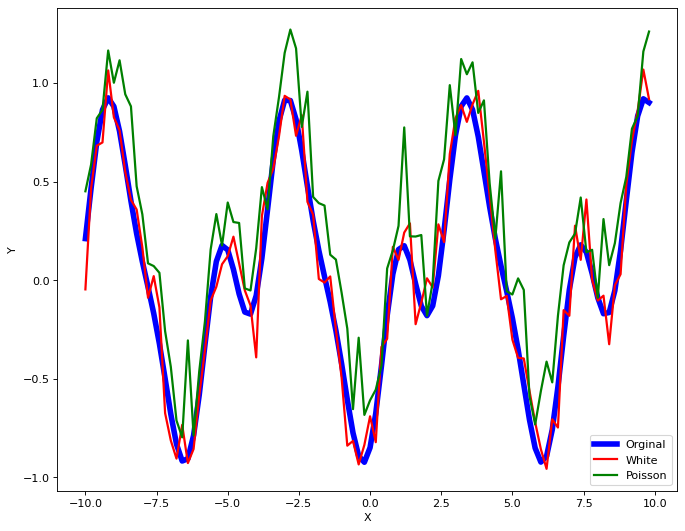

In [190]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(x, y, color = 'Blue', linewidth = 5)
plt.plot(x, y1, color = 'red', linewidth = 2)
plt.plot(x, y2, color = 'green', linewidth = 2)
plt.legend(["Orginal", "White", "Poisson"], loc ="lower right")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [191]:
yt1 = []
yt2 = []
mse1 = []
mse2 = []
for i in range(15):
    yt1.append(np.poly1d(np.polyfit(x, y1, i+1))(x))
    mse1.append((np.square(y - yt1[i])).mean())
    yt2.append(np.poly1d(np.polyfit(x, y2, i+1))(x))
    mse2.append((np.square(y - yt2[i])).mean())

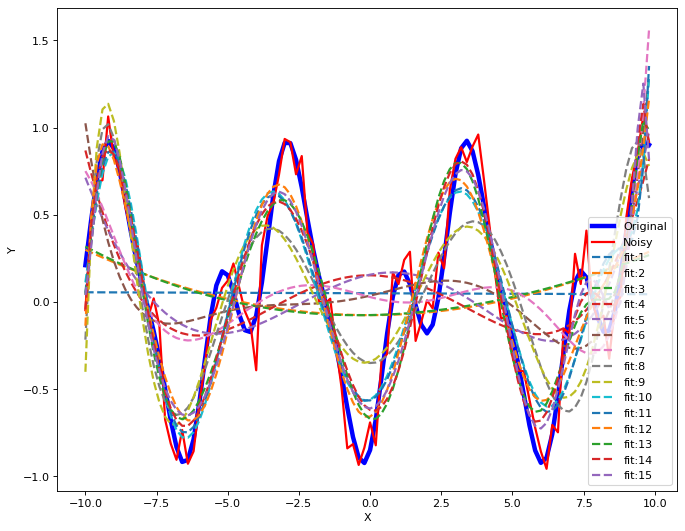

In [192]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(x, y, linewidth = 4, label = "Original", color = 'blue')
plt.plot(x, y1, linewidth = 2, label = "Noisy", color = 'red')
for i in range(15):
    plt.plot(x, yt1[i], linestyle = 'dashed', linewidth = 2, label = "fit:"+str(i+1))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc ="lower right")
plt.show()

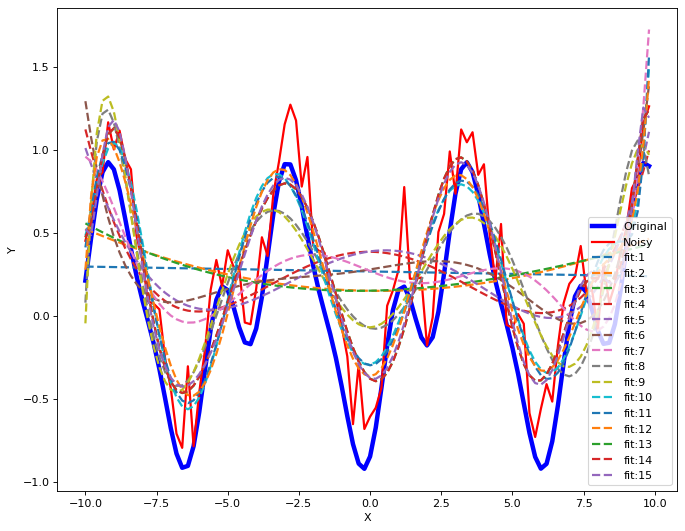

In [193]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(x, y, linewidth = 4, label = "Original", color = 'blue')
plt.plot(x, y2, linewidth = 2, label = "Noisy", color = 'red')
for i in range(15):
    plt.plot(x, yt2[i], linestyle = 'dashed', linewidth = 2, label = "fit:"+str(i+1))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc ="lower right")
plt.show()

توضیحات اینکه کدوم بهرته 

In [194]:
best1 = np.where(mse1 == np.amin(mse1))[0][0]
best2 = np.where(mse2 == np.amin(mse2))[0][0]

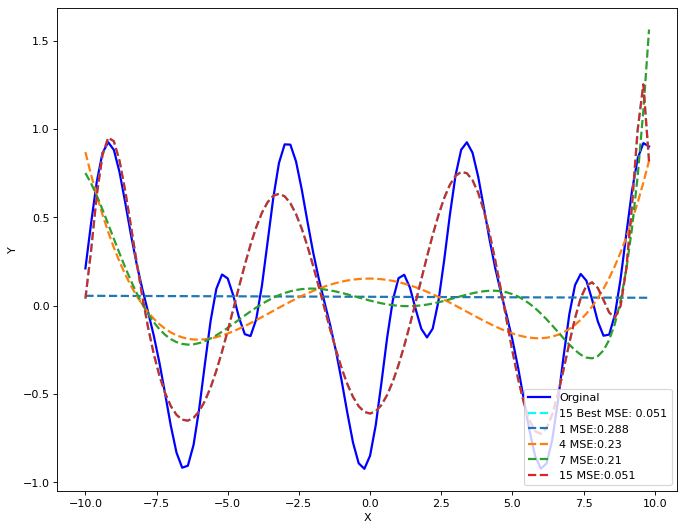

In [195]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(x, y, linewidth = 2, label = "Orginal", color = 'blue')
plt.plot(x, yt1[best1], linestyle = 'dashed', linewidth = 2, label = str(best1+1) + " Best MSE: " + str(round(mse1[best1],3)), color = 'cyan')
for i in [0, 3, 6, 14]:
    plt.plot(x, yt1[i], linestyle = 'dashed', linewidth = 2, label = str(i+1) + " MSE:" + str(round(mse1[i],3)))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc ="lower right")
plt.show()

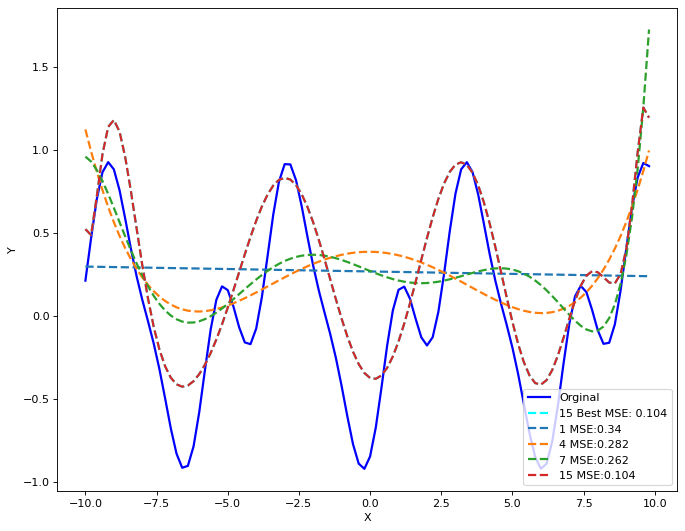

In [196]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(x, y, linewidth = 2, label = "Orginal", color = 'blue')
plt.plot(x, yt2[best2], linestyle = 'dashed', linewidth = 2, label = str(best2+1) + " Best MSE: " + str(round(mse2[best2],3)), color = 'cyan')
for i in [0, 3, 6, 14]:
    plt.plot(x, yt2[i], linestyle = 'dashed', linewidth = 2, label = str(i+1) + " MSE:" + str(round(mse2[i],3)))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc ="lower right")
plt.show()

توضیحات بیشتر

 ---

# Q5) Stress Lysis Dataset

In [107]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Stress-Lysis.csv')
data.head(3)

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,mid
1,21.41,90.41,93,mid
2,27.12,96.12,196,high


### Alef)

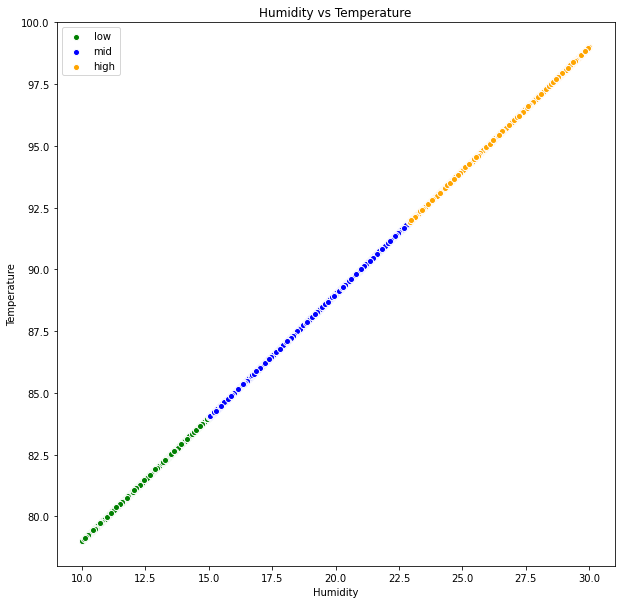

In [3]:
plt.figure(figsize=(10, 10))
plt.scatter(data[data["Stress_Level"] == 'low']['Humidity'], data[data["Stress_Level"] == 'low']['Temperature'], 
            marker = '.', edgecolor = 'white', facecolors='green', s=150, label='low')
plt.scatter(data[data["Stress_Level"] == 'mid']['Humidity'], data[data["Stress_Level"] == 'mid']['Temperature'], 
            marker = '.', edgecolor = 'white', facecolors='blue', s=150, label='mid')
plt.scatter(data[data["Stress_Level"] == 'high']['Humidity'], data[data["Stress_Level"] == 'high']['Temperature'], 
            marker = '.', edgecolor = 'white', facecolors='orange', s=150, label='high')
plt.title('Humidity vs Temperature')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.legend(loc='upper left')
plt.show()

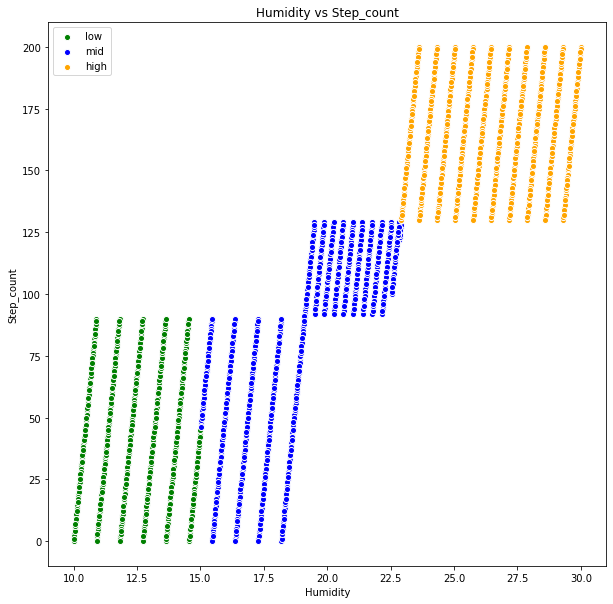

In [4]:
plt.figure(figsize=(10, 10))
plt.scatter(data[data["Stress_Level"] == 'low']['Humidity'], data[data["Stress_Level"] == 'low']['Step_count'], 
            marker = '.', edgecolor = 'white', facecolors='green', s=150, label='low')
plt.scatter(data[data["Stress_Level"] == 'mid']['Humidity'], data[data["Stress_Level"] == 'mid']['Step_count'], 
            marker = '.', edgecolor = 'white', facecolors='blue', s=150, label='mid')
plt.scatter(data[data["Stress_Level"] == 'high']['Humidity'], data[data["Stress_Level"] == 'high']['Step_count'], 
            marker = '.', edgecolor = 'white', facecolors='orange', s=150, label='high')
plt.title('Humidity vs Step_count')
plt.xlabel('Humidity')
plt.ylabel('Step_count')
plt.legend(loc='upper left')
plt.show()

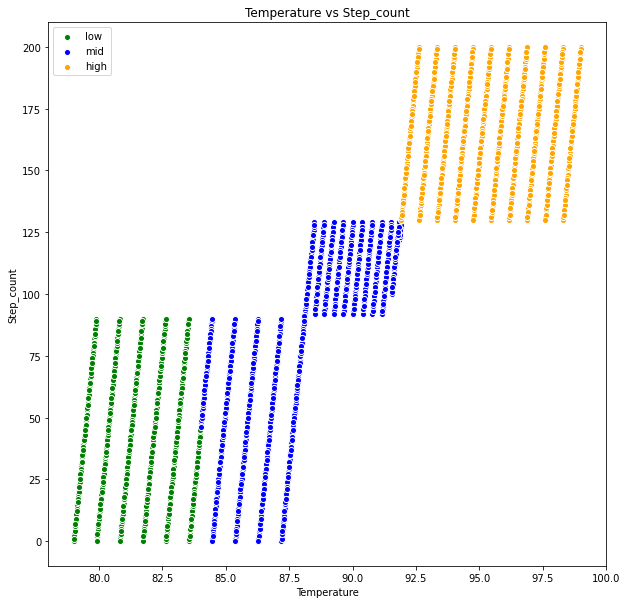

In [5]:
plt.figure(figsize=(10, 10))
plt.scatter(data[data["Stress_Level"] == 'low']['Temperature'], data[data["Stress_Level"] == 'low']['Step_count'], 
            marker = '.', edgecolor = 'white', facecolors='green', s=150, label='low')
plt.scatter(data[data["Stress_Level"] == 'mid']['Temperature'], data[data["Stress_Level"] == 'mid']['Step_count'], 
            marker = '.', edgecolor = 'white', facecolors='blue', s=150, label='mid')
plt.scatter(data[data["Stress_Level"] == 'high']['Temperature'], data[data["Stress_Level"] == 'high']['Step_count'], 
            marker = '.', edgecolor = 'white', facecolors='orange', s=150, label='high')
plt.title('Temperature vs Step_count')
plt.xlabel('Temperature')
plt.ylabel('Step_count')
plt.legend(loc='upper left')
plt.show()

tozihat inke kodom vase tabaghe band khati behtare

### Be) 

In [270]:
def standardize(X_tr):
    return (X_tr - X_tr.mean()) / (X_tr.max() - X_tr.min())

In [301]:
st_data = standardize(data.drop(columns=['Stress_Level']))
st_data['target'] = data['Stress_Level']

In [302]:
train = st_data.sample(frac=0.8)
test = st_data.drop(train.index)

Ytrain = train['target']
Xtrain = train.drop(columns=['target'])

Ytest = test['target']
Xtest = test.drop(columns=['target'])

In [303]:
Xtrain.head(3)

,Humidity,Temperature,Step_count
1102,-0.3325,-0.3325,-0.190707
1930,0.3110,0.3110,0.384293
1410,0.2790,0.2790,0.419293


In [304]:
Ytrain.head(3)

1102     low
1930    high
1410    high
Name: target, dtype: object

### Logistic Regression with 1_vs_all

In [305]:
class LogisticRegression(object):
    def __init__(self, eta=0.1, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        self.confm = np.zeros((3,3))
    
    def _predict_one(self, x):
        return max((x[1].dot(w), c) for w, c in self.w)[1]
        
    def predict(self, X):
        X1 = copy.deepcopy(X)
        X1.insert(0, "Alaki", 1, True)
        return [self._predict_one(row) for row in X1.iterrows()]

    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        X1 = copy.deepcopy(X)
        X1.insert(0, "Alaki", 1, True)
        self.w = []
        m = X1.shape[0]

        for i in np.unique(y):
            y_copy = np.where(y == i, 1, 0)
            w = np.ones(X1.shape[1])

            for _ in range(self.n_iter):
                output = X1.dot(w)
                errors = y_copy - self._sigmoid(output)
                w += self.eta / m * errors.dot(X1)
            self.w.append((w, i))
        return self

In [306]:
logi = LogisticRegression(eta=0.25, n_iter=100).fit(Xtrain, Ytrain)

In [307]:
import prettytable

x = prettytable.PrettyTable(["" ," ", "Pred", "cted", "  "])
x.add_row(["" ," ", "Low", "Mid", "High"])
x.add_row(["Actual" ,"Low", "1" ,"1" ,"1"])
x.add_row(["" ,"Mid", "1" ,"1" ,"1"])
x.add_row(["" ,"High", "1" ,"1" ,"1"])
print(x)
print("Train Acurecy: ",logi.score(Xtrain, Ytrain))
print("Test Acurecy:  ",logi.score(Xtest, Ytest))

+--------+------+------+------+------+
|        |      | Pred | cted |      |
+--------+------+------+------+------+
|        |      | Low  | Mid  | High |
| Actual | Low  |  1   |  1   |  1   |
|        | Mid  |  1   |  1   |  1   |
|        | High |  1   |  1   |  1   |
+--------+------+------+------+------+
Train Acurecy:  0.905683947532792
Test Acurecy:   0.915


### Jim) 

In [313]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

In [314]:
X = data.drop(columns=['Stress_Level'])
y = data['Stress_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [321]:
model = LogisticRegression()
ovr = OneVsRestClassifier(model)
ovr.fit(X_train, y_train)
yhat = ovr.predict(X_test)
cm = confusion_matrix(y_test, yhat)
sc = ovr.score(X_test, y_test)

In [322]:
print("Confusion Matrix:\n", cm)
print("Score:\n", sc)


Confusion Matrix:
 [[142   0   0]
 [  0  94   2]
 [  0   0 163]]
Score:
 0.9950124688279302


 ---

# Q6) Logistic Regression

In [198]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [199]:
def DayereSaz(quantity, rho_start, rho_end, center_x, center_y):
    rhos = np.random.rand(quantity,1) * (rho_end-rho_start) + rho_start
    phases = np.random.rand(quantity,1) * 2 * math.pi
    vec = []
    for i in range(len(rhos)):
        vec.append(complex(rhos[i] * math.cos(phases[i]), rhos[i] * math.sin(phases[i])))
    # extract real part
    x = [ele.real+center_x for ele in vec]
    # extract imaginary part
    y = [ele.imag+center_y for ele in vec]
    return x,y

In [200]:
# First Mode: 
x11, y11 = DayereSaz(200, 4, 9, 1.5, 0)
x12, y12 = DayereSaz(200, 0, 6, 1.5, 0)

In [201]:
# Second Mode: 
x21 = np.random.normal(1.5, 1, 100)
y21 = np.random.normal(0, 1, 100)
x22, y22 = DayereSaz(200, 2, 6, 1.5, 0)

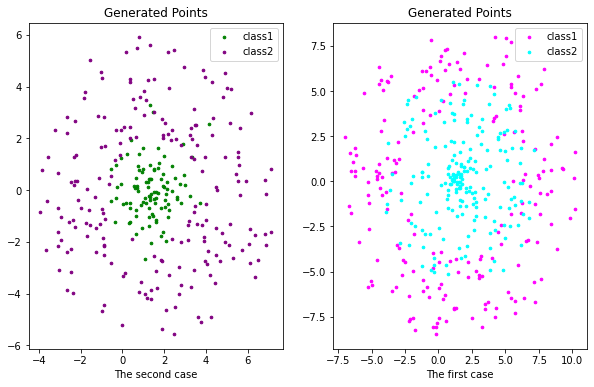

In [202]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[1].scatter(x11, y11, color='magenta', s=7, label='class1')
ax[1].scatter(x12, y12, color='cyan', s=7, label='class2')
ax[1].legend(loc ="upper right")
ax[1].set_xlabel(xlabel = 'The first case')

ax[0].scatter(x21, y21, color='green', s=7, label='class1')
ax[0].scatter(x22, y22, color='purple', s=7, label='class2')
ax[0].legend(loc ="upper right")
ax[0].set_xlabel(xlabel = 'The second case')

for a in ax.flat:
    a.set_title("Generated Points", fontsize=12)

In [203]:
# Second Mode:
# 
#  